<a href="https://colab.research.google.com/github/FerdousiHaque/google-git/blob/master/Bert_Offensiveness_Detection12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Download game

Mounted at /content/drive/
/content/drive/My Drive/Download game


In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 33.3 MB/s 
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 1.7 MB 56.7 MB/s 
     |████████████████████████████████| 6.0 MB 60.5 MB/s 
     |████████████████████████████████| 439 kB 58.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [4]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
endoded_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"


In [5]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install SpeechRecognition moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 220 kB/s 
     |████████████████████████████████| 62 kB 676 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.9 MB 103.5 MB/s 


In [9]:
pip install git+https://github.com/ernie-mlg/rpunct.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ernie-mlg/rpunct.git to /tmp/pip-req-build-1ylk4qtx
  Running command git clone -q https://github.com/ernie-mlg/rpunct.git /tmp/pip-req-build-1ylk4qtx
     |████████████████████████████████| 981 kB 24.8 MB/s 
     |████████████████████████████████| 9.7 MB 60.5 MB/s 
     |████████████████████████████████| 213 kB 73.9 MB/s 
     |████████████████████████████████| 804.1 MB 7.5 kB/s 
     |████████████████████████████████| 69 kB 7.4 MB/s 
     |████████████████████████████████| 1.9 MB 59.0 MB/s 
     |████████████████████████████████| 5.8 MB 59.2 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 9.2 MB 78.6 MB/s 
     |████████████████████████████████| 125 kB 75.8 MB/s 
     |████████████████████████████████| 1.3 MB 72.7 MB/s 
     |████████████████████████████████| 7.6 MB 68.9 MB/s 
     |██████████████████████

In [10]:
import pandas as pd
import io

url = 'https://raw.githubusercontent.com/FerdousiHaque/Database-Project/master/off_labeled1_2data.csv'

df = pd.read_csv(url)
df.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,1,1,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,1,3,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,1,3,1,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,1,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,1,6,1,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
df['class'].value_counts()

1    20620
2     4163
Name: class, dtype: int64

In [12]:
4163/20620

0.2018913676042677

In [13]:
df.groupby('class').describe()

Unnamed: 0                                                             \
           count          mean          std  min     25%      50%       75%   
class                                                                         
1        20620.0  12699.490786  7315.105532  1.0  6412.5  12701.5  19009.25   
2         4163.0  12590.555369  7222.217918  0.0  6204.5  12759.0  18957.00   

                  count            ... offensive_language       neither  \
           max    count      mean  ...                75%  max    count   
class                              ...                                    
1      25295.0  20620.0  3.257759  ...                3.0  9.0  20620.0   
2      25296.0   4163.0  3.172712  ...                1.0  4.0   4163.0   

                                                    
           mean       std  min  25%  50%  75%  max  
class                                               
1      1.001843  0.048214  1.0  1.0  1.0  1.0  4.0  
2      2.845544  0.795181  2.0  2.0  3.0  3.0  9.0  

[2 rows x 40 columns]

In [14]:
df_spam = df[df['class']== 2]
df_spam.shape

df_ham = df[df['class']== 1]
df_ham.shape

df_ham_down = df_ham.sample(df_spam.shape[0])
df_ham_down.shape

df_balanced = pd.concat([df_spam, df_ham_down])
df_balanced.shape

df_balanced['class'].value_counts()

2    4163
1    4163
Name: class, dtype: int64

In [15]:
df_balanced['language'] = df_balanced['class'].apply(lambda x:0 if x == 2 else 1) 

df_balanced.sample(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,language
15308,15668,3,2,1,1,1,RT @GMB_Ace: I'm a Get Money nigga So da hoes ...,1
11930,12234,3,1,2,1,1,It's a small world and hoes make it smaller,1
2461,2512,3,1,1,2,2,"@AnthonyCumia Enjoy it,I'm happy for you,but I...",0
17668,18068,3,1,3,1,1,RT @TheFunnyTeens: When someone tells me I sho...,1
13039,13359,3,1,1,3,2,My goal for soccer this year is to get a yello...,0
9126,9381,3,1,1,3,2,Flabby bird sounds Turrible. Lol. I'll just st...,0
2205,2250,3,1,1,2,2,1-100000 You are a semi-evolved monkey that is...,0
7095,7293,3,1,1,3,2,@strawberrycoca ling ling krunkchip,0
19863,20304,3,1,3,1,1,RT @prettytreazure: @DetroitPlayer @1stName_Br...,1
15872,16241,3,1,2,1,1,RT @JuanNDaCut: Explaining to a girl how u don...,1


In [16]:
df_balanced['language'].value_counts()

0    4163
1    4163
Name: language, dtype: int64

In [17]:
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity

X_train, X_test, y_train, y_test = train_test_split(df_balanced['tweet'], df_balanced['language'], stratify=df_balanced['language'])
X_train.head(5)

13171    NEW Nashville Noise! @LukeBryanOnline loves bu...
22944                With birds ill share this lonely view
19576    RT @lordemusic: i am so pleased and proud to h...
24335    only my school wouldnt give kids their schedul...
8222     Buddy slapped his rent stress out on that mess...
Name: tweet, dtype: object

In [18]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
endoded_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

bert_preprocess = hub.KerasLayer(preprocess_url)
bert_encoder = hub.KerasLayer(endoded_url)

In [19]:
def get_sentence_embeding(sen):
  preprocess_text = bert_preprocess(sen)
  return bert_encoder(preprocess_text)['pooled_output']



In [20]:
# bert layers
text_input = tf.keras.layers.Input(shape=(), dtype = tf.string, name ="text")
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)


# neural network layer
l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])

l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [22]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           ]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
model.fit(X_train, y_train, epochs=12)

Epoch 1/12
196/196 [==============================] - 1858s 9s/step - loss: 0.6472 - accuracy: 0.6236 - precision: 0.6245 - recall: 0.6201
Epoch 2/12
196/196 [==============================] - 1846s 9s/step - loss: 0.5866 - accuracy: 0.6996 - precision: 0.6974 - recall: 0.7050
Epoch 3/12
196/196 [==============================] - 1841s 9s/step - loss: 0.5488 - accuracy: 0.7380 - precision: 0.7332 - recall: 0.7482
Epoch 4/12
196/196 [==============================] - 1834s 9s/step - loss: 0.5291 - accuracy: 0.7452 - precision: 0.7443 - recall: 0.7470
Epoch 5/12
196/196 [==============================] - 1829s 9s/step - loss: 0.5113 - accuracy: 0.7598 - precision: 0.7578 - recall: 0.7636
Epoch 6/12
196/196 [==============================] - 1826s 9s/step - loss: 0.4985 - accuracy: 0.7641 - precision: 0.7708 - recall: 0.7518
Epoch 7/12
196/196 [==============================] - 1826s 9s/step - loss: 0.4906 - accuracy: 0.7699 - precision: 0.7726 - recall: 0.7649
Epoch 8/12
196/196 [=======

In [23]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 615s 9s/step - loss: 0.4456 - accuracy: 0.7939 - precision: 0.7807 - recall: 0.8175


[0.44555604457855225,
 0.7939481139183044,
 0.7807339429855347,
 0.8174831867218018]

In [24]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

66/66 [==============================] - 615s 9s/step


Text(33.0, 0.5, 'Truth')

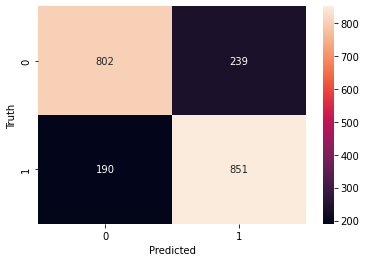

In [25]:
import seaborn as sn
from matplotlib import pyplot as plt

sn.heatmap(confusion_matrix(y_test, (y_predicted > 0.5)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(classification_report(y_test, (y_predicted > 0.5)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1041
           1       0.78      0.82      0.80      1041

    accuracy                           0.79      2082
   macro avg       0.79      0.79      0.79      2082
weighted avg       0.79      0.79      0.79      2082



In [31]:
import speech_recognition as sr 
import moviepy as mp
from moviepy.video.io.VideoFileClip import VideoFileClip
import re, string
from rpunct import RestorePuncts
from langdetect import detect
import re, string

clip = VideoFileClip(r"christmasvibeschilling.mp4")
clip.audio.write_audiofile(r"converted.wav")

r = sr.Recognizer()
audio = sr.AudioFile("converted.wav")
for i in range(int(clip.duration/180)):
    with audio as source:
        r.adjust_for_ambient_noise(source)
        audio_file1 = r.record(source, offset=(i*180), duration=180)
    #try:
    result = r.recognize_google(audio_file1, language = 'en-IN', show_all = True)
    with open('christmas.txt',mode ='w') as file:
        file.write(str(result))
        file.write("\n")
    rpunct = RestorePuncts(use_cuda=False)
    with open("christmas.txt") as mytxt:
        for line in mytxt:
          #try:
              file1 = rpunct.punctuate(line, lang='en')
              reviews = re.split("[" + string.punctuation + "]+", file1)
              filtered_reviews = []
              for review in reviews:
                if review and review != ' ' and review != 'alternative' and review != 'transcript'  and review != 'final'  and review != 'True' and not review.replace(' ', '').isdigit():
                    filtered_reviews.append(review)
              try:      
                valuePredict = model.predict(filtered_reviews)
              except KeyError:
                        print()

    for i in range(len(valuePredict)):
      try :
          print(filtered_reviews[i] + " : Predicted Value = "+ '{:.2f}'.format(valuePredict[i][0]))
      except:
          continue
      if (valuePredict[i][0] > 0.59):
         print("\033[1m - Offensive language detected\033[0m")

[MoviePy] Writing audio in converted.wav


100%|██████████| 40808/40808 [00:15<00:00, 2631.79it/s]

[MoviePy] Done.


1/1 [==============================] - 4s 4s/step
alive I : Predicted Value = 0.54
m Alive I : Predicted Value = 0.53
m Alive I : Predicted Value = 0.53
m Alive : Predicted Value = 0.39
confidence : Predicted Value = 0.46
alive I : Predicted Value = 0.54
m Alive I : Predicted Value = 0.53
m Alive I : Predicted Value = 0.53
m Alive yeah : Predicted Value = 0.56
alive I : Predicted Value = 0.54
m Alive I : Predicted Value = 0.53
m Alive I : Predicted Value = 0.53
m Alive life : Predicted Value = 0.57
 True : Predicted Value = 0.47
1/1 [==============================] - 5s 5s/step
everybody Life : Predicted Value = 0.53
form former Everyone I faked death fucked get fucked okay : Predicted Value = 0.78
 - Offensive language detected
confidence : Predicted Value = 0.46
everybody Life : Predicted Value = 0.53
form former Everyone I faked death fucked Jeff fucked okay : Predicted Value = 0.81
 - Offensive language detected
everybody Life : Predicted Value = 0.53
form former Everyone I faked D

In [32]:
reviews=['youu got wild bitches telling you lies']
model.predict(reviews)
     

1/1 [==============================] - 0s 394ms/step


array([[0.94003946]], dtype=float32)